In [8]:
import cv2
import numpy as np
import os

def calculate_scene_signature(image):
    if image is None:
        return np.zeros(3)  # Return zeros for invalid images

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and enhance key features
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Use the Laplacian operator for edge detection
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

    # Calculate the mean and standard deviation of the Laplacian
    laplacian_mean, laplacian_std = cv2.meanStdDev(laplacian)

    # Calculate the entropy of the grayscale image
    entropy = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    entropy = -np.sum(entropy * (np.log2(entropy + 1e-10)))

    return np.array([laplacian_mean[0][0], laplacian_std[0][0], entropy])

def classify_scene(test_image_path, scene_signatures):
    test_image = cv2.imread(test_image_path)
    test_signature = calculate_scene_signature(test_image)

    # Compare the signature of the test image with each scene's signature
    similarities = []
    for scene, scene_signature in scene_signatures.items():
        similarity = np.sum((scene_signature - test_signature)**2)
        similarities.append((scene, similarity))

    # Sort scenes based on similarity (lower similarity is better)
    similarities.sort(key=lambda x: x[1])

    # Return the scene with the lowest similarity
    return similarities[0][0]

def extract_contour_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Use Canny edge detector to find contours
    edges = cv2.Canny(blurred_image, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Return the number of contours as a feature
    return len(contours)

if __name__ == "__main__":
    # Define paths to example images for each scene
    scene_paths = {
        'BEACH': ['beach_1.jpg', 'beach_2.jpg', 'beach_3.jpg'],
        'RESTAURANT': ['restaurant_1.jpg', 'restaurant_2.jpg', 'restaurant_3.jpg'],
        'MOUNTAIN': ['mountain_1.jpg', 'mountain_2.jpg', 'mountain_3.jpg'],
        'ROAD': ['road_1.jpg', 'road_2.jpg', 'road_3.jpg']
    }

    # Calculate scene signatures for each example scene
    scene_signatures = {}
    for scene, image_paths in scene_paths.items():
        signature_list = []
        for img_path in image_paths:
            img = cv2.imread(img_path)
            signature_list.append(calculate_scene_signature(img))
        scene_signatures[scene] = np.mean(signature_list, axis=0)

    # Test the classifier on a folder of mixed scenes
    test_folder_path = "C:/Users/user/Desktop/TEST DIP 2"
    for test_image_name in os.listdir(test_folder_path):
        test_image_path = os.path.join(test_folder_path, test_image_name)
        if os.path.isfile(test_image_path):
            contour_features = extract_contour_features(cv2.imread(test_image_path))
            print(f"{test_image_name} has {contour_features} contours.")



BEACH (1).jpeg has 82 contours.
BEACH (1).jpg has 29 contours.
BEACH (10).jpg has 13268 contours.
BEACH (11).jpg has 4522 contours.
BEACH (2).jpeg has 86 contours.
BEACH (3).jpeg has 47 contours.
BEACH (4).jpeg has 6 contours.
BEACH (4).jpg has 21 contours.
BEACH (5).jpeg has 18 contours.
BEACH (6).jpeg has 53 contours.
BEACH (7).jpg has 41 contours.
BEACH (9).jpg has 29257 contours.
MOUNTAIN (1).jpg has 980 contours.
MOUNTAIN (11).jpg has 3698 contours.
MOUNTAIN (12).jpg has 1004 contours.
MOUNTAIN (13).jpg has 1099 contours.
MOUNTAIN (14).jpg has 6743 contours.
MOUNTAIN (15).jpg has 1543 contours.
MOUNTAIN (16).jpg has 13869 contours.
MOUNTAIN (17).jpg has 256 contours.
MOUNTAIN (18).jpg has 784 contours.
MOUNTAIN (19).jpg has 3150 contours.
RESTAURANT (1).jpg has 433 contours.
RESTAURANT (35).jpg has 619 contours.
RESTAURANT (36).jpg has 388 contours.
RESTAURANT (38).jpg has 2619 contours.
RESTAURANT (39).jpg has 240 contours.
RESTAURANT (41).jpg has 6225 contours.
RESTAURANT (42).j

In [1]:
import cv2
import numpy as np
import os

def calculate_contour_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the number of contours as a feature
    contour_features = len(contours)
    return contour_features

def classify_scene(test_image_path, scene_contour_features):
    test_image = cv2.imread(test_image_path)
    test_contour_features = calculate_contour_features(test_image)

    # Compare the contour features of the test image with each scene's features
    similarities = []
    for scene, scene_features in scene_contour_features.items():
        similarity = np.abs(scene_features - test_contour_features)
        similarities.append((scene, similarity))

    # Sort scenes based on similarity (lower similarity is better)
    similarities.sort(key=lambda x: x[1])

    # Return the scene with the lowest similarity
    return similarities[0][0]

if __name__ == "__main__":
    # Define paths to example images for each scene
    scene_paths = {
        'BEACH': ['beach_1.jpg', 'beach_2.jpg', 'beach_3.jpg'],
        'RESTAURANT': ['restaurant_1.jpg', 'restaurant_2.jpg', 'restaurant_3.jpg'],
        'MOUNTAIN': ['mountain_1.jpg', 'mountain_2.jpg', 'mountain_3.jpg'],
        'ROAD': ['road_1.jpg', 'road_2.jpg', 'road_3.jpg']
    }

    # Calculate contour features for each example scene
    scene_contour_features = {}
    for scene, image_paths in scene_paths.items():
        contour_features_list = [calculate_contour_features(cv2.imread(img_path)) for img_path in image_paths]
        scene_contour_features[scene] = np.mean(contour_features_list)

    # Test the classifier on a folder of mixed scenes
    test_folder_path = "C:/Users/user/Desktop/TEST DIP 2"
    for test_image_name in os.listdir(test_folder_path):
        test_image_path = os.path.join(test_folder_path, test_image_name)
        if os.path.isfile(test_image_path):
            predicted_scene = classify_scene(test_image_path, scene_contour_features)
            print(f"{test_image_name} is likely a {predicted_scene} scene.")


BEACH (1).jpeg is likely a BEACH scene.
BEACH (1).jpg is likely a ROAD scene.
BEACH (10).jpg is likely a MOUNTAIN scene.
BEACH (11).jpg is likely a MOUNTAIN scene.
BEACH (2).jpeg is likely a ROAD scene.
BEACH (3).jpeg is likely a ROAD scene.
BEACH (4).jpeg is likely a ROAD scene.
BEACH (4).jpg is likely a ROAD scene.
BEACH (5).jpeg is likely a ROAD scene.
BEACH (6).jpeg is likely a BEACH scene.
BEACH (7).jpg is likely a ROAD scene.
BEACH (9).jpg is likely a MOUNTAIN scene.
MOUNTAIN (1).jpg is likely a MOUNTAIN scene.
MOUNTAIN (11).jpg is likely a MOUNTAIN scene.
MOUNTAIN (12).jpg is likely a MOUNTAIN scene.
MOUNTAIN (13).jpg is likely a MOUNTAIN scene.
MOUNTAIN (14).jpg is likely a MOUNTAIN scene.
MOUNTAIN (15).jpg is likely a MOUNTAIN scene.
MOUNTAIN (16).jpg is likely a MOUNTAIN scene.
MOUNTAIN (17).jpg is likely a BEACH scene.
MOUNTAIN (18).jpg is likely a RESTAURANT scene.
MOUNTAIN (19).jpg is likely a MOUNTAIN scene.
RESTAURANT (1).jpg is likely a RESTAURANT scene.
RESTAURANT (35)

In [7]:
import cv2
import os
import numpy as np

def calculate_color_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = hist.flatten()
    hist /= hist.sum()
    return hist

def calculate_contours(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)

def calculate_scene_features(image):
    color_hist = calculate_color_histogram(image)
    num_contours = calculate_contours(image)
    return {'color_hist': color_hist, 'num_contours': num_contours}

def calculate_histogram_similarity(hist1, hist2):
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

def calculate_contours_similarity(contours1, contours2):
    return np.abs(contours1 - contours2)

def classify_scene(test_image_path, scene_features):
    test_image = cv2.imread(test_image_path)
    test_features = calculate_scene_features(test_image)

    # Compare the features of the test image with each scene's features
    similarities = []
    for scene, scene_feature in scene_features.items():
        color_similarity = calculate_histogram_similarity(test_features['color_hist'], scene_feature['color_hist'])
        contours_similarity = calculate_contours_similarity(test_features['num_contours'], scene_feature['num_contours'])
        total_similarity = color_similarity + contours_similarity
        similarities.append((scene, total_similarity))

    # Sort scenes based on similarity (lower similarity is better)
    similarities.sort(key=lambda x: x[1])

    # Return the scene with the lowest similarity
    return similarities[0][0]

if __name__ == "__main__":
    # Define paths to example images for each scene
    scene_paths = {
        'BEACH': ['beach_1.jpg', 'beach_2.jpg', 'beach_3.jpg'],
        'RESTAURANT': ['restaurant_1.jpg', 'restaurant_2.jpg', 'restaurant_3.jpg'],
        'MOUNTAIN': ['mountain_1.jpg', 'mountain_2.jpg', 'mountain_3.jpg'],
        'ROAD': ['road_1.jpg', 'road_2.jpg', 'road_3.jpg']
    }

    # Calculate features for each example scene
    scene_features = {}
    for scene, image_paths in scene_paths.items():
        scene_features_list = [calculate_scene_features(cv2.imread(img_path)) for img_path in image_paths]
        color_hist_mean = np.mean([f['color_hist'] for f in scene_features_list], axis=0)
        num_contours_mean = np.mean([f['num_contours'] for f in scene_features_list])
        scene_features[scene] = {'color_hist': color_hist_mean, 'num_contours': num_contours_mean}

    # Test the classifier on a folder of mixed scenes
    test_folder_path = "C:/Users/user/Desktop/TEST DIP 2"
    for test_image_name in os.listdir(test_folder_path):
        test_image_path = os.path.join(test_folder_path, test_image_name)
        if os.path.isfile(test_image_path):
            predicted_scene = classify_scene(test_image_path, scene_features)
            print(f"{test_image_name} is likely a {predicted_scene} scene.")


BEACH (1).jpeg is likely a BEACH scene.
BEACH (1).jpg is likely a BEACH scene.
BEACH (10).jpg is likely a RESTAURANT scene.
BEACH (11).jpg is likely a RESTAURANT scene.
BEACH (2).jpeg is likely a BEACH scene.
BEACH (3).jpeg is likely a ROAD scene.
BEACH (4).jpeg is likely a BEACH scene.
BEACH (4).jpg is likely a BEACH scene.
BEACH (5).jpeg is likely a ROAD scene.
BEACH (6).jpeg is likely a ROAD scene.
BEACH (7).jpg is likely a RESTAURANT scene.
BEACH (9).jpg is likely a RESTAURANT scene.
MOUNTAIN (1).jpg is likely a MOUNTAIN scene.
MOUNTAIN (11).jpg is likely a MOUNTAIN scene.
MOUNTAIN (12).jpg is likely a MOUNTAIN scene.
MOUNTAIN (13).jpg is likely a MOUNTAIN scene.
MOUNTAIN (14).jpg is likely a MOUNTAIN scene.
MOUNTAIN (15).jpg is likely a MOUNTAIN scene.
MOUNTAIN (16).jpg is likely a MOUNTAIN scene.
MOUNTAIN (17).jpg is likely a BEACH scene.
MOUNTAIN (18).jpg is likely a MOUNTAIN scene.
MOUNTAIN (19).jpg is likely a MOUNTAIN scene.
RESTAURANT (1).jpg is likely a RESTAURANT scene.
RE

BEACH (1).jpeg is likely a BEACH scene.
BEACH (1).jpg is likely a BEACH scene.
BEACH (10).jpg is likely a RESTAURANT scene.
BEACH (11).jpg is likely a BEACH scene.
BEACH (2).jpeg is likely a BEACH scene.
BEACH (3).jpeg is likely a ROAD scene.
BEACH (4).jpeg is likely a BEACH scene.
BEACH (4).jpg is likely a BEACH scene.
BEACH (5).jpeg is likely a ROAD scene.
BEACH (6).jpeg is likely a BEACH scene.
BEACH (7).jpg is likely a RESTAURANT scene.
BEACH (9).jpg is likely a ROAD scene.
MOUNTAIN (1).jpg is likely a MOUNTAIN scene.
MOUNTAIN (11).jpg is likely a MOUNTAIN scene.
MOUNTAIN (12).jpg is likely a MOUNTAIN scene.
MOUNTAIN (13).jpg is likely a MOUNTAIN scene.
MOUNTAIN (14).jpg is likely a MOUNTAIN scene.
MOUNTAIN (15).jpg is likely a MOUNTAIN scene.
MOUNTAIN (16).jpg is likely a MOUNTAIN scene.
MOUNTAIN (17).jpg is likely a BEACH scene.
MOUNTAIN (18).jpg is likely a RESTAURANT scene.
MOUNTAIN (19).jpg is likely a MOUNTAIN scene.
RESTAURANT (1).jpg is likely a RESTAURANT scene.
RESTAURANT

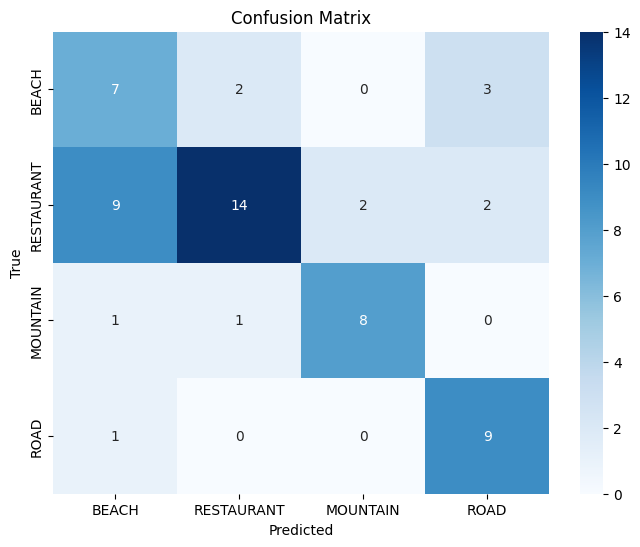

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# Function to create and display a confusion matrix
def display_confusion_matrix(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels, labels=classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def calculate_color_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = hist.flatten()
    hist /= hist.sum()
    return hist

def calculate_contours(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)

def calculate_scene_features(image):
    color_hist = calculate_color_histogram(image)
    num_contours = calculate_contours(image)
    return {'color_hist': color_hist, 'num_contours': num_contours}

def calculate_histogram_similarity(hist1, hist2):
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR)

def calculate_contours_similarity(contours1, contours2):
    return np.abs(contours1 - contours2)

def classify_scene(test_image_path, scene_features):
    test_image = cv2.imread(test_image_path)
    test_features = calculate_scene_features(test_image)

    # Compare the features of the test image with each scene's features
    similarities = []
    for scene, scene_feature in scene_features.items():
        color_similarity = calculate_histogram_similarity(test_features['color_hist'], scene_feature['color_hist'])
        contours_similarity = calculate_contours_similarity(test_features['num_contours'], scene_feature['num_contours'])
        total_similarity = color_similarity + contours_similarity
        similarities.append((scene, total_similarity))

    # Sort scenes based on similarity (lower similarity is better)
    similarities.sort(key=lambda x: x[1])

    # Return the scene with the lowest similarity
    return similarities[0][0]

if __name__ == "__main__":
    # List to store true and predicted labels
    true_labels = []
    predicted_labels = []

    # Test the classifier on a folder of mixed scenes
    test_folder_path = "C:/Users/user/Desktop/TEST DIP 2"
    for test_image_name in os.listdir(test_folder_path):
        test_image_path = os.path.join(test_folder_path, test_image_name)
        if os.path.isfile(test_image_path):
            true_scene = test_image_name.split(" ")[0]  # Extract true scene label from the file name
            predicted_scene = classify_scene(test_image_path, scene_features)
            
            true_labels.append(true_scene)
            predicted_labels.append(predicted_scene)

            print(f"{test_image_name} is likely a {predicted_scene} scene.")

    # Display the confusion matrix
    scene_classes = ['BEACH', 'RESTAURANT', 'MOUNTAIN', 'ROAD']  # Add or modify classes as needed
    display_confusion_matrix(true_labels, predicted_labels, scene_classes)
